In [2]:
import numpy as np
import pandas as pd

In [3]:
gen_df = pd.read_csv('spotify_daily_charts.csv')
artists = pd.read_csv('spotify_daily_charts_artists.csv')
tracks = pd.read_csv('spotify_daily_charts_tracks.csv')

In [4]:
#top 50 artist accdg to streams

streams =gen_df.groupby(['artist'], as_index=False)[['streams']].sum().sort_values(by='streams', ascending=False)
streams.iloc[:5]

,artist,streams
100,Ben&Ben,637518801
225,Ed Sheeran,480456420
200,December Avenue,438907047
412,LANY,438613851
516,Moira Dela Torre,397559815


In [5]:
#top 50 artist frequency

top50 = gen_df[gen_df['position'] <= 50]
x = top50.groupby(['artist'], as_index=False)[['date']].count().sort_values(by='date', ascending=False).iloc[:5]
x

,artist,date
35,Ben&Ben,4404
193,Moira Dela Torre,2502
69,December Avenue,2348
75,Ed Sheeran,2020
148,LANY,2015


In [21]:
z = gen_df[gen_df['position']<=50].groupby(['artist'], as_index=False)[['track_id']].nunique().sort_values(by='track_id', ascending=False)
z[(z['artist']=='Ben&Ben') |( z['artist']=='Moira Dela Torre') | (z['artist']=='December Avenue') | (z['artist']=='Ed Sheeran')]

,artist,track_id
75,Ed Sheeran,22
193,Moira Dela Torre,18
35,Ben&Ben,17
69,December Avenue,6


In [6]:
#number of songs released per year 

gen_df['date'] = pd.to_datetime(gen_df['date'])
datey=gen_df.copy()

datey['year']=datey['date'].dt.year
date50 = datey[datey['position'] <= 50]


y17 = date50[(date50['year']==2017)].groupby(['artist'], as_index=False)[['track_id']].nunique().mean()
y18 = date50[(date50['year']==2018)].groupby(['artist'], as_index=False)[['track_id']].nunique().mean()
y19 = date50[(date50['year']==2019)].groupby(['artist'], as_index=False)[['track_id']].nunique().mean()
y20 = date50[(date50['year']==2020)].groupby(['artist'], as_index=False)[['track_id']].nunique().mean()

avesongsrels = (y17 + y18 + y19 + y20) / 4
avesongsrels

track_id    2.431111
dtype: float64

In [10]:
#number of streams per year

gen_df['date'] = pd.to_datetime(gen_df['date'])
datex=gen_df.copy()
datex['year']=datex['date'].dt.year

y17 = datex[(datex['year']==2017) & (datex['position']<=50)].streams.mean() #2017 - 97,255
y18 = datex[(datex['year']==2018) & (datex['position']<=50)].streams.mean() #2018 - 98,528
y19 = datex[(datex['year']==2019) & (datex['position']<=50)].streams.mean() #2019 - 119,978
y20 = datex[(datex['year']==2020) & (datex['position']<=50)].streams.mean() #2020 - 113,296

avestreams = (y17 + y18 + y19 + y20) / 4
avestreams

107264.35032481609

In [186]:
topart = x.merge(gen_df, how='inner', on='artist')
plotdata = topart[topart['position']<=50].groupby('artist')[['track_name']].nunique().sort_values(by='track_name',ascending=False)

,track_name
artist,
LANY,20
Ed Sheeran,19
Ben&Ben,17
Moira Dela Torre,14
December Avenue,6


In [164]:


#number of songs that are in the top50
ptop50 = topart[topart['position']<=50].groupby('artist', as_index=False)[['track_id']].nunique().sort_values(by='track_id', ascending=False)
ptop50

,artist,track_id
3,LANY,27
2,Ed Sheeran,22
4,Moira Dela Torre,18
0,Ben&Ben,17
1,December Avenue,6


In [181]:
pless50 = topart[topart['position']>50].groupby('artist', as_index=False)[['track_id']].nunique().sort_values(by='track_id', ascending=False)
pless50

,artist,track_id
3,LANY,60
2,Ed Sheeran,42
4,Moira Dela Torre,32
0,Ben&Ben,28
1,December Avenue,13


In [75]:
gen_df.groupby('artist')[['track_id']].count().sort_values(by='track_id', ascending=False).iloc[:5]

,track_id
artist,
Ed Sheeran,9657
LANY,8629
Ben&Ben,8066
Moira Dela Torre,6450
December Avenue,5946


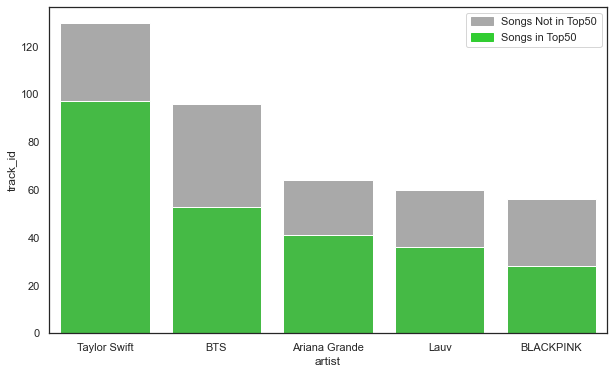

In [153]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


sns.set(style="white")
plt.figure(figsize=(10,6))

bar1 = sns.barplot(x='artist',  y="track_id", data=pless50, color='darkgrey')

bar2 = sns.barplot(x='artist',  y="track_id", data=ptop50, color='limegreen')

top_bar = mpatches.Patch(color='darkgrey', label='Songs Not in Top50')
bottom_bar = mpatches.Patch(color='limegreen', label='Songs in Top50')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()